In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [2]:
df = pd.read_csv('DSM/DSM.csv',header=0, skipinitialspace=True, dtype={'HrMn': object})

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['speed']=pd.to_numeric(df['speed'], downcast='integer', errors='coerce')
df['dir']=pd.to_numeric(df['dir'], downcast='integer', errors='coerce')
df['dir_max']=pd.to_numeric(df['dir_max'], downcast='integer', errors='coerce')
df['speed_max']=pd.to_numeric(df['speed_max'], downcast='integer', errors='coerce')
df = df.dropna()

In [4]:
df=df[['date','HrMn','dir','speed','dir_max','speed_max']]
df

,date,HrMn,dir,speed,dir_max,speed_max
0,20060101,0711,87.0,5.0,100.0,6.0
1,20060101,0712,85.0,5.0,87.0,5.0
2,20060101,0713,87.0,5.0,96.0,7.0
3,20060101,0714,91.0,5.0,94.0,6.0
4,20060101,0715,90.0,5.0,87.0,5.0
5,20060101,0716,86.0,5.0,90.0,7.0
6,20060101,0717,81.0,5.0,66.0,5.0
7,20060101,0718,83.0,5.0,98.0,6.0
8,20060101,0719,83.0,5.0,73.0,5.0
9,20060101,0720,75.0,5.0,70.0,5.0


In [5]:
df['Hr']=df['HrMn'].apply(lambda x: int(str(x)[:-2]))
df.dir = np.radians(df.dir)
temp_df =df.groupby(['date', 'Hr']).agg({'speed' : np.mean,'dir': sp.stats.circmean,'speed_max': np.max}).reset_index()
df.dir = np.degrees(df.dir)
temp_df.dir = np.degrees(temp_df.dir)
temp_df['HrMn']=temp_df['Hr'].apply(lambda x: "%02d00"%x)

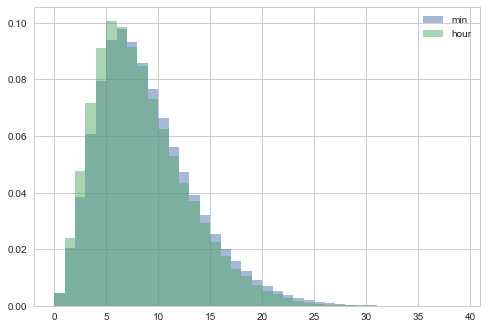

In [23]:
bins=arange(0,40)
df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['speed'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True)

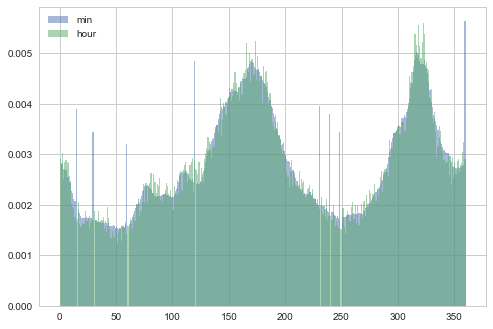

In [26]:
bins=arange(0,361)
df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
temp_df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='hour')
plt_configure(legend=True)

In [ ]:
sss

In [ ]:
df, speed_redistribution_info = randomize_speed(df, 'round_up')

In [ ]:
max_speed = df.speed.max()
x = linspace(0, max_speed, 20)
data_size = len(df.speed)

weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y_weibull = sp.stats.exponweib.pdf(x, *weibull_params)
plot(x, y_weibull*data_size, '--', color='black',label='Weibull') 

df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')  

In [ ]:
fig,ax = plt.subplots()

ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

_, k_shape, _, lamb_scale = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))

In [ ]:
ssss

In [ ]:
ssss

In [ ]:
sns.palplot(sns.color_palette("hls"))

In [ ]:
sns.palplot(mpl.rcParams['axes.color_cycle'])

In [ ]:
sns.palplot(sns.color_palette("Blues_r"))

In [ ]:
sns.palplot(sns.cubehelix_palette(reverse=True))

In [ ]:
import matplotlib
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

x = randn(5000)

# Make a normed histogram. It'll be multiplied by 100 later.
plt.hist(x, bins=50, normed=True, edgecolor = "black")

# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# from __future__ import division
from import_file import *
from helpers.parallel_helper import *
load_libs()

In [ ]:
prop_cycle = mpl.rcParams['axes.prop_cycle']

In [ ]:
prop_cycle